<h1 align= 'center'>Análisis de VAN y TIR

In [2]:
import pandas as pd
import numpy as np
import numpy_financial as npf

# Simulamos un calendario de flujos
flujos = [-100000, 12000, 15000, 18000, 20000, 22000, 25000, 27000, 29000, 30000, 31000]
años = pd.date_range(start='2025', periods=len(flujos), freq='YE')

# Crear DataFrame
df_flujos = pd.DataFrame({
    'Fecha': años,
    'Flujo_Caja': flujos
})
df_flujos

,Fecha,Flujo_Caja
0,2025-12-31,-100000
1,2026-12-31,12000
2,2027-12-31,15000
3,2028-12-31,18000
4,2029-12-31,20000
5,2030-12-31,22000
6,2031-12-31,25000
7,2032-12-31,27000
8,2033-12-31,29000
9,2034-12-31,30000


In [3]:
tasa_descuento = 0.10  

# Agregando columnas de Año y Periodos para el calculo del descuento de flujos

df_flujos['Año'] = df_flujos['Fecha'].dt.year
df_flujos['Periodo'] = range(len(df_flujos))

# VAN: Valor Actual = Flujo / (1 + r)^t

df_flujos['Valor_Actual'] = df_flujos['Flujo_Caja'] / (1 + tasa_descuento) ** df_flujos['Periodo']


In [4]:
df_flujos

,Fecha,Flujo_Caja,Año,Periodo,Valor_Actual
0,2025-12-31,-100000,2025,0,-100000.000000
1,2026-12-31,12000,2026,1,10909.090909
2,2027-12-31,15000,2027,2,12396.694215
3,2028-12-31,18000,2028,3,13523.666416
4,2029-12-31,20000,2029,4,13660.269107
5,2030-12-31,22000,2030,5,13660.269107
6,2031-12-31,25000,2031,6,14111.848251
7,2032-12-31,27000,2032,7,13855.269192
8,2033-12-31,29000,2033,8,13528.714026
9,2034-12-31,30000,2034,9,12722.928551


Gráfico del flujo de fondos

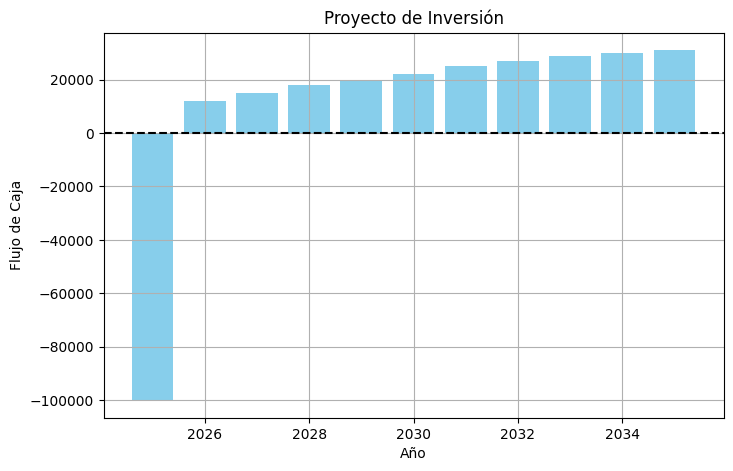

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(df_flujos['Año'], df_flujos['Flujo_Caja'], color='skyblue')
plt.axhline(0, color='black', linestyle='--')
plt.title("Proyecto de Inversión")
plt.xlabel("Año")
plt.ylabel("Flujo de Caja")
plt.grid(True);

Análisis de VAN

In [6]:
VAN = df_flujos['Valor_Actual'].sum()

if VAN >= 0:
    print(f"VAN del proyecto: ${VAN:,.2f}. El Proyecto es rentable")
else:
    print(f"VAN del proyecto: ${VAN:,.2f}. El Proyecto no es rentable")

VAN del proyecto: $30,320.59. El Proyecto es rentable


Análisis de TIR

In [7]:
TIR = npf.irr(df_flujos['Flujo_Caja'])
print(f"TIR del proyecto: {TIR:.2%}")

TIR del proyecto: 15.57%


Análisis de sensibilidad

In [8]:
# Trazando 100 posibles  tazas de descuento entre 0.05 a 0.2
tasas = np.linspace(0.05, 0.2, 100)

# Calculando una lista de VAN posibles por cada tasa posible
van_list = [sum(f / (1 + r)**i for i, f in enumerate(flujos)) for r in tasas]

# Buscando la tasa (aproximada) donde el VAN se acerca a 0
idx_tir_aprox = np.argmin(np.abs(van_list)) # Obteniendo el indice la Tir del VAN con la 
                                            # Mínima distancia a 0 tomando el valor absoluto de  todos los VAN posible

# Como cada elemento de van_list esta hehco en funcion de la tasa dentro de tasas, 
# obtener el indice de la lista de VAN con el valor mas cercano a 0, 
# significa encontrar la tasa de descuento que permite obtener ese resultado

tir_aprox = tasas[idx_tir_aprox]

van_tir = van_list[idx_tir_aprox]


In [9]:
if van_tir <= 0:
    tir_aprox = tasas[idx_tir_aprox -1 ]
    van_tir = van_list[idx_tir_aprox - 1]

In [37]:
print(f"TIR aproximada que logra el equilibrio (VAN=0): {tir_aprox}")
display(f"VAN obtenido según la TIR de la tasa de interes de equilibrio aprox: ${van_tir:,.2f}")

TIR aproximada que logra el equilibrio (VAN=0): 0.15454545454545457


'VAN obtenido según la TIR de la tasa de interes de equilibrio aprox: $534.71'

Gráfico de sensibilidad del van a la Tasa de Descuento y punto de equilibrio

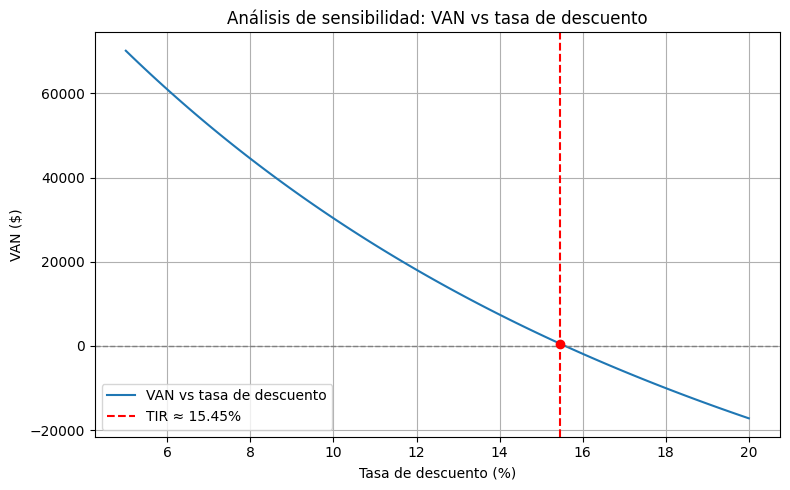

In [11]:

# Gráfico
plt.figure(figsize=(8, 5))
plt.plot(tasas * 100, van_list, label = 'VAN vs tasa de descuento')

# Linea constante de VAN = 0
plt.axhline(0, color = 'gray', linestyle='--', linewidth = 1)

# Linea constante de  la TIR de equillibrio
plt.axvline(tir_aprox * 100, color='red', linestyle='--', label = f'TIR ≈ {tir_aprox*100:.2f}%')

# Punto de intersección
plt.plot(tir_aprox * 100, van_tir, 'ro')

# Etiquetas
plt.title("Análisis de sensibilidad: VAN vs tasa de descuento")
plt.xlabel("Tasa de descuento (%)")
plt.ylabel("VAN ($)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Tiempo necesario para recuperar la inversión

In [15]:
# Payback simple

acumulado = np.cumsum(flujos)
años_payback = np.argmax(acumulado >= 0) # Obteniendo el primer indice en el que la suma acumulada de fondos da >= 0

print(f"Tiempo necesario para recuperar la inversión: {años_payback} años.")

Tiempo necesario para recuperar la inversión: 6 años.


In [16]:
# Payback descontado

tasa = 0.10
flujos_desc = [f / (1 + tasa) ** i for i, f in enumerate(flujos)]
acum_desc = np.cumsum(flujos_desc)
años_payback_desc = np.argmax(acum_desc >= 0)   # Obteniendo el primer indice en el 
                                                # que la suma acumulada de fondos descontados da  >= 0

print(f"Tiempo necesario para recuperar la inversión considerando flujos de fondos descontados: {años_payback_desc} años.")

Tiempo necesario para recuperar la inversión considerando flujos de fondos descontados: 8 años.


Análisis simple de escenarios Optimista / Pesimista

In [18]:
flujos_optimista = [flujos[0]] + [f * 1.2 for f in flujos[1:]]
flujos_pesimista = [flujos[0]] + [f * 0.8 for f in flujos[1:]]


# VAN para cada escenario usando las herramientas propias de numpy_financial

van_base = npf.npv(tasa_descuento, flujos)
van_optimista = npf.npv(tasa_descuento, flujos_optimista)
van_pesimista = npf.npv(tasa_descuento, flujos_pesimista)

# TIR para cada escenario
tir_base = npf.irr(flujos)
tir_optimista = npf.irr(flujos_optimista)
tir_pesimista = npf.irr(flujos_pesimista)

# Creando DataFrame para mostrar los resultados en una tabla
escenarios = pd.DataFrame({
    'Escenario': ['Pesimista', 'Base', 'Optimista'],
    'VAN': [van_pesimista, van_base, van_optimista],
    'TIR': [tir_pesimista, tir_base, tir_optimista]
})

escenarios = pd.DataFrame(escenarios)

escenarios

,Escenario,VAN,TIR
0,Pesimista,4256.473398,0.108339
1,Base,30320.591748,0.155737
2,Optimista,56384.710098,0.198403
